### Libraries


In [30]:
import pandas as pd
import numpy as np
import os
import pickle
from PIL import Image

### Subsample AG_NEWS

Starting from 120000 records in train / 7600 test with 4 classes we will obtain:
- train with 20k records
- text with 1264 records 

each class equally represented.

In [9]:
train_ag = pd.read_csv('/home2/sgrosso/data/AG_NEWS/train.csv', sep=',', header=None,
                       names=['class','title', 'description'])
test_ag = pd.read_csv('/home2/sgrosso/data/AG_NEWS/test.csv', sep=',', header=None,
                       names=['class','title', 'description'])

print('AG_NEWS train shape:', train_ag.shape)
print('AG_NEWS test shape:', test_ag.shape)

AG_NEWS train shape: (120000, 3)
AG_NEWS test shape: (7600, 3)


In [11]:
test_ag.head(5)

,class,title,description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [13]:
#TRAIN
#count of samples for each class
train_ag['class'].value_counts()

3    30000
4    30000
2    30000
1    30000
Name: class, dtype: int64

In [14]:
#TRAIN
#count of samples for each class
class_counts = train_ag['class'].value_counts()

subsample_size = class_counts // 6

# init subsampled train ds
ss_train = pd.DataFrame(columns=train_ag.columns)

# subsample for each class
for class_label, count in subsample_size.items():
    class_data = train_ag[train_ag['class'] == class_label]
    sampled_indices = class_data.sample(count).index
    ss_train = pd.concat([ss_train, train_ag.loc[sampled_indices]])

# Reset the index of the subsampled DataFrame
ss_train.reset_index(drop=True, inplace=True)

ss_train.shape

(20000, 3)

In [17]:
ss_train.to_csv('train.csv', index=False, header=False)

let's make the same thing for test

In [18]:
test_ag['class'].value_counts()

3    1900
4    1900
2    1900
1    1900
Name: class, dtype: int64

In [19]:
##TEST
#count of samples for each class
class_counts = test_ag['class'].value_counts()

subsample_size = class_counts // 6

# init subsampled train ds
ss_test = pd.DataFrame(columns=test_ag.columns)

# subsample for each class
for class_label, count in subsample_size.items():
    class_data = test_ag[test_ag['class'] == class_label]
    sampled_indices = class_data.sample(count).index
    ss_test = pd.concat([ss_test, test_ag.loc[sampled_indices]])

# Reset the index of the subsampled DataFrame
ss_test.reset_index(drop=True, inplace=True)

ss_test.shape

(1264, 3)

In [20]:
ss_test.to_csv('test.csv', index=False, header=False)

### Subsample cifar100

60k 32x32 images in total, 100 classes(grouped in 20 superclasses) and 600 images per class.
Starting from 50k images in train / 10k in test with, we will obtain:
- train with 8333 records
- text with 1666 records 

In [21]:
meta_file_path = '/home2/sgrosso/data/cifar100/cifar-100-python/meta'
with open(meta_file_path, 'rb') as f:
    meta_data = pickle.load(f)

print(meta_data)


{'fine_label_names': ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'w

Numero di immagini nel batch: 50000
Etichetta: 44


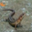

In [29]:
data_batch_file_path = '/home2/sgrosso/data/cifar100/cifar-100-python/train' 

with open(data_batch_file_path, 'rb') as f:
    data_batch = pickle.load(f, encoding='bytes')

data = data_batch[b'data']
labels = data_batch[b'fine_labels']

print("Numero di immagini nel batch:", len(data))

# Visualizza un'immagine a caso
index = np.random.randint(len(data))
image = data[index]
image = image.reshape(3, 32, 32).transpose(1, 2, 0)  # Ridimensiona l'immagine in un formato visualizzabile (32x32x3)
label = labels[index]

print("Etichetta:", label)
img = Image.fromarray(image)
img.show()


### Subsample Flickr30k

### Subsample MSCOCO